Student 1: Maarten van Bockstaele (2262607)

Student 2: Alexander Deleeck (2263131)

A ternary search tree has nodes with the following attributes:
* a character, can be `None`;
* a Boolean flag that indicates whether the character represented
  by this node has been the last in a string that was inserted in the
  tree;
* the "less-than" child;
* the "equals" child and
* the "larger-than" child.

The data structure should support the following operations:
* string insert
* string search
* prefix string search
* return the number of strings stored in the data structure
* return all strings stored in the data structure

Also ensure that an instance of the data structure can be visualy represented, e.g., in aSCII format.

# Implementation

In [2]:
%load_ext autoreload
%autoreload 2

The data structure has been implemented as a class.

In [3]:
class TSTNode:
    def __init__(self, char): # Instantiation of TSTNode object
        self.char = char # Node character
        self.left = None # Node left child
        self.middle = None # # Node middle child
        self.right = None # Node right child
        self.is_end_of_word = False # Node end of word flag

    def insert(self, word, index): # Method (called on TST node) for inserting string with given index on node in tree
        if word[index] < self.char: # Check if value of letter in string is less than value of node
            if self.left is None: # Check if node has no left child
                self.left = TSTNode(word[index]) # Create new left child node for the current character of string
            self.left.insert(word, index) # Insert character of string on left node
        elif word[index] > self.char: # Check if character value is greater than value of node character
            if self.right is None: # Check if right child does not exist
                self.right = TSTNode(word[index]) # Create right child  for node 
            self.right.insert(word, index) # Insert string on right child 
        elif index < len(word) - 1: # Check if current string character is not last character of string 
            if self.middle is None: # Check whether current node has no middle child
                self.middle = TSTNode(word[index + 1]) # Create new middle child for node, which is the next character in the string
            self.middle.insert(word, index + 1) # Insert word in middle child node and continue to next character in string
        else: # End of word has been reached
            self.is_end_of_word = True # Set end-of-word flag to true

    def search(self, word, index, exact=False):
        if word[index] < self.char: # Check whether value of string character is less than value of current node character (go to left child)
            if self.left is None: # Check whether node has no left child
                return False # Searched string is not in TST
            # Continue search on left child node
            return self.left.search(word, index, exact)
        elif word[index] > self.char: # Check whether value of string character is greater than value of current node character (go to right child)
            if self.right is None: # Check whether node has no right child
                return False # Searched string is not in TST
            return self.right.search(word, index, exact) # Continue search on right child node
        elif index < len(word) - 1: # Check if current string char is not last in string
            if self.middle is None: # Check whether node has no middle child
                return False # Searched string is not in TST
            return self.middle.search(word, index + 1, exact) # Continue search on middle child node, and evaluate next character in string
        elif exact: # End of searched string has been reached, check whether searched string must exactly be in TST
            return self.is_end_of_word # Returns true if the current node is flagged as end of word (string is exactly in TST), False if only prefix of string is in TST
        return True # If only prefix search is required, return True when leaf node has been reached

    def get_all_words(self, prefix, words): # This method recursively explores each branch of the tree, by iteratively concatonating a newly found letter to a current prefix, and appends the complete word to the words list once it has reached a terminating node
        if self.is_end_of_word: # Recursive base (stopping) condition, when current node is leaf node
            words.append(prefix + self.char) # Concatonate prefix + leaf node character and append to words list
        if self.left is not None: # Check existence of left child node
            self.left.get_all_words(prefix, words) # Apply method on left child node
        if self.middle is not None: # Check existence of middle child node
            self.middle.get_all_words(prefix + self.char, words) # Concatonate prefix + current node character, and apply method on middle child node with updated prefix
        if self.right is not None: # Check existence of right child node
            self.right.get_all_words(prefix, words) # Apply method on right child node

    def _to_string(self, indent='       '):
        repr_str = indent + repr(self)

        if self.left is not None:
            repr_str += '\n_lt_:' + self.left._to_string(indent + '  ')
        if self.middle is not None:
            repr_str += '\n_eq_:' + self.middle._to_string(indent + '  ')
        if self.right is not None:
            repr_str += '\n_gt_:' + self.right._to_string(indent + '  ')
        return repr_str

    def __repr__(self): # Defines string representation for node
        return f'char: {self.char}, terminates: {self.is_end_of_word}'


class TernarySearchTree:
    def __init__(self): # Instantiate TST object
        self._root = None
        self._terminates = False

    def insert(self, word): # Operation for inserting a new string in the TST
        if word == "": # Check if the string is empty
            self._terminates = True
        else: 
            if self._root is None: # Check whether the TST has no root node
                self._root = TSTNode(word[0]) # Assign the first letter of the string as root node in case there was none
            self._root.insert(word, 0) # Insert the new string via the root node

    def search(self, word, exact=False):
        if word == '': # Check if searched string is empty
            return not exact 
        elif self._root is None: # Check whether TST contains no root node
            return False 
        return self._root.search(word, 0, exact) # Apply search on root node

    def all_strings(self):
        if self._terminates: # Check whether TST is empty
            words = [""] # Make list with empty string
        else:
            words = [] # Instantiate empty list
        if self._root is not None: # Check existence of root node
            self._root.get_all_words("", words) # Apply recursive string retrieval on root node, and provide an empty prefix & list
        return words # Return the resulting list of words

    def __len__(self):
        if self._root is None: # Check whether TST is empty
            return 0
        else:
            return len(self.all_strings()) # Return length of list of all stored strings

    def __repr__(self): # Defines how the TST will be represented in string format
        if self._root is None: # Check if TST is empty
            return 'empty tree'
        else:
            return f'terminates: {self._terminates} \n' + self._root._to_string()

# Example usage

Create a new empty ternery search tree.

In [4]:
tst = TernarySearchTree()

Inserting 6 different strings into the tree.

In [5]:
tst.insert('hassle')
tst.insert('has')
tst.insert('slender')
tst.insert('endearing')
tst.insert('enduring')
tst.insert('rings')

Display the tree.

In [6]:
print(tst)

terminates: False 
       char: h, terminates: False
_lt_:         char: e, terminates: False
_eq_:           char: n, terminates: False
_eq_:             char: d, terminates: False
_eq_:               char: e, terminates: False
_eq_:                 char: a, terminates: False
_eq_:                   char: r, terminates: False
_eq_:                     char: i, terminates: False
_eq_:                       char: n, terminates: False
_eq_:                         char: g, terminates: True
_gt_:                 char: u, terminates: False
_eq_:                   char: r, terminates: False
_eq_:                     char: i, terminates: False
_eq_:                       char: n, terminates: False
_eq_:                         char: g, terminates: True
_eq_:         char: a, terminates: False
_eq_:           char: s, terminates: True
_eq_:             char: s, terminates: False
_eq_:               char: l, terminates: False
_eq_:                 char: e, terminates: True
_gt_:         char: 

Insert another string `'aqt'`.

In [7]:
tst.insert('aqt')

In [8]:
print(tst)

terminates: False 
       char: h, terminates: False
_lt_:         char: e, terminates: False
_lt_:           char: a, terminates: False
_eq_:             char: q, terminates: False
_eq_:               char: t, terminates: True
_eq_:           char: n, terminates: False
_eq_:             char: d, terminates: False
_eq_:               char: e, terminates: False
_eq_:                 char: a, terminates: False
_eq_:                   char: r, terminates: False
_eq_:                     char: i, terminates: False
_eq_:                       char: n, terminates: False
_eq_:                         char: g, terminates: True
_gt_:                 char: u, terminates: False
_eq_:                   char: r, terminates: False
_eq_:                     char: i, terminates: False
_eq_:                       char: n, terminates: False
_eq_:                         char: g, terminates: True
_eq_:         char: a, terminates: False
_eq_:           char: s, terminates: True
_eq_:             char: s,

The tree should now contain seven strings.

In [9]:
len(tst)

7

Check whether all the stored strings can be fetched and returned as a list:

In [10]:
tst.all_strings()

['aqt', 'endearing', 'enduring', 'has', 'hassle', 'rings', 'slender']

Search for the string `'end'`, it should be found since it is a prefix of other strings in the TST. We specify the exact argument to be False, in order to search for prefixes and not exact strings.

In [12]:
tst.search('end', False)

True

The string `'enc'` should not be found.

In [13]:
tst.search('enc')

False

The tree can also contain the empty string.

In [13]:
tst.insert('')

In [14]:
len(tst)

8

In [14]:
print(tst)

terminates: True 
       char: a, terminates: False
_eq_:         char: b, terminates: False
_eq_:           char: c, terminates: True
_gt_:           char: q, terminates: False
_eq_:             char: t, terminates: True


In [15]:
tst.all_strings()

['', 'aqt', 'endearing', 'enduring', 'has', 'hassle', 'rings', 'slender']

# Testing

The file `data/search_trees/insert_words.txt` contains words that we can insert into a tree.

In [16]:
tst = TernarySearchTree()
with open('data/search_trees/insert_words.txt') as file:
    words = [
        line.strip() for line in file
    ]
for word in words:
    tst.insert(word)
unique_words = set(words)

Verify the length of the data stucture.

In [17]:
assert len(tst) == len(unique_words), \
       f'{len(tst)} in tree, expected {len(unique_words)}'

Verify that all words that were inserted can be found.

In [18]:
for word in unique_words:
    assert tst.search(word), f'{word} not found'

Verify that all prefixes can be found.

In [19]:
for word in unique_words:
    for i in range(len(word) - 1, 0, -1):
        prefix = word[:i]
        assert tst.search(prefix), f'{prefix} not found'

Check that when searching for a exact match, only exact inserted words are retrieved and no prefixes of words.

In [20]:
for word in unique_words:
    for i in range(len(word), 0, -1):
        prefix = word[:i]
        if prefix not in unique_words:
            assert not tst.search(prefix, exact=True), f'{prefix} found'

Check that the empty string is in the tree (since it is a prefix of any string).

In [21]:
assert tst.search(''), 'empty string not found'

Check that the empty string is not in the tree for an exact search.

In [22]:
assert not tst.search('', exact=True), 'empty string found'

Check that words in the file `data/search_trees/not_insert_words.txt` can not be found in the tree.

In [23]:
with open('data/search_trees/not_insert_words.txt') as file:
    for line in file:
        word = line.strip()
        assert not tst.search(word), f'{word} should not be found'

Check that all strings are returned.

In [24]:
all_strings = tst.all_strings()
assert len(all_strings) == len(unique_words), \
       f'{len(all_strings)} words, expected {len(unique_words)}'
assert sorted(all_strings) == sorted(unique_words), 'words do not match'

If not output was generated, all tests have passed.

In [25]:
with open('data/search_trees/corncob_lowercase.txt') as file:
    words = [line.strip() for line in file]


In [26]:
import random
import time
sizes = [100, 500, 1_000, 5_000, 10_000, 20_000, 30_000, 40_000, 50_000]


samples = [
    random.sample(words, k=size) for size in sizes
]

nr_runs = 10
times = {}
insert_sample = random.sample(words, k=20)
for sample in samples:
    TST = TernarySearchTree()
    for word in sample:
        TST.insert(word)
    times[len(sample)] = 0.0
    for _ in range(nr_runs):
        start_time = time.time_ns()
        for word in insert_sample:
            TST.insert(word)
        end_time = time.time_ns()
        times[len(sample)] += end_time - start_time
    times[len(sample)] /= nr_runs*1_000_000.0
times


{100: 0.09953,
 500: 0.19968,
 1000: 0.19944,
 5000: 0.09947,
 10000: 0.09985,
 20000: 0.20095,
 30000: 0.19944,
 40000: 0.1,
 50000: 0.0988}

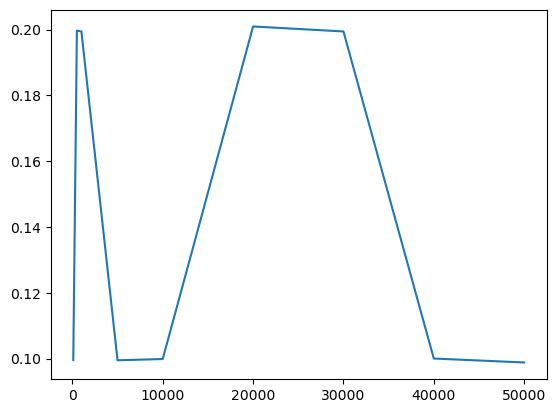

In [27]:
import matplotlib.pyplot as plt
plt.plot(times.keys(), times.values())


On the plot, it appears to be the case that certain lengths of word insertions can happen relatively quickly, while others take much more time. We think that this happens due to some sets of words sharing many prefixes, speeding everything up, while other sets have a more diverse set of words and prefixes, which causes more operations to have to be performed. 

# Complexity analysis

## Insertion
- The ideal case for insertion is when the least number of comparisons have to be performed to insert a new string of length n. This ideal case occurs when the new string can be inserted directly at the root node of the TST, because no comparisons have to be performed. 
- In the average case, insertion will take time proportional to the height of the TST. Thus, theoretically the insertion of a string of length k in a TST with n nodes will have a complexity of O(log n + k), since there will occur k middle paths to be traversed and log(n) left/right traversals.
Thus, the TST is best suited for handling a number of (relatively) short strings with common prefixes.

## Search
- Similarly to the insertion operation, search will also theoretically be O(log n + k) running time. This is for the same reasons as the insertion case, namely an expected k traversals to middle nodes and log(n) traversals to the left and right children. 